In [2]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator

In [3]:
###Data Reading/Data Understanding

In [4]:
data_dir_train = pathlib.Path("/home/sanat/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test  = pathlib.Path("/home/sanat/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test")
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


In [5]:
batch_size = 32
img_height = 180
img_width = 180

In [6]:
###Dataset creation

In [7]:
train_datagen = ImageDataGenerator(
        rescale=1. / 255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
train_ds = train_datagen.flow_from_directory(
        data_dir_train,
        target_size=(img_width, img_height),
        batch_size=batch_size)

val_ds = test_datagen.flow_from_directory(
        data_dir_test,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        shuffle=True)

Found 2239 images belonging to 9 classes.
Found 118 images belonging to 9 classes.


In [9]:
train_ds2 = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'training',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


2022-04-20 16:32:07.410256: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-04-20 16:32:07.410286: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-20 16:32:07.410302: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (sanat-Inspiron-13-5378): /proc/driver/nvidia/version does not exist
2022-04-20 16:32:07.410807: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
val_ds2 = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'validation',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [12]:
class_names = train_ds2.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


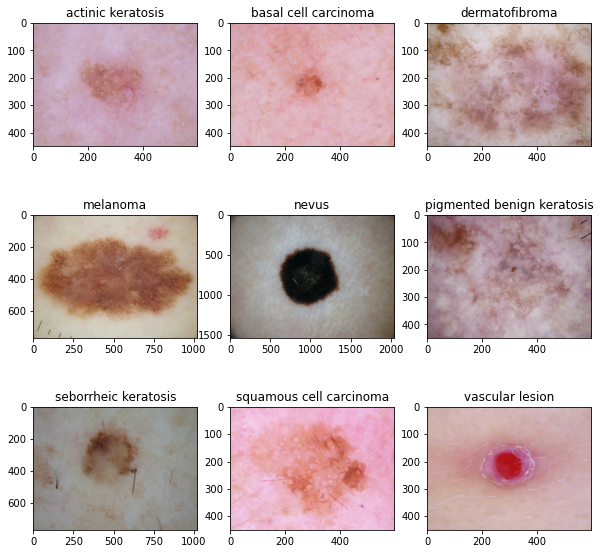

In [13]:
import matplotlib.image as mpimg
plt.figure(figsize=(10,10))
for i in range(9): 
  plt.subplot(3, 3, i + 1)
  image = mpimg.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)

In [14]:
## Model Building & training

In [15]:
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
nb_fc_neurons = 512
nb_filter = 32
input_shape = (img_width, img_height, 3)
    
model = Sequential()
    
model.add(Conv2D(nb_filter, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
    
model.add(Conv2D(nb_filter*2, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(nb_filter*4, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
    
model.add(Flatten())
model.add(Dense(nb_fc_neurons))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [21]:
model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 activation (Activation)     (None, 178, 178, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 87, 87, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                    

In [23]:
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
70/70 [==============================] - 115s 2s/step - loss: 0.4028 - accuracy: 0.8816 - val_loss: 0.3504 - val_accuracy: 0.8889
Epoch 2/20
70/70 [==============================] - 111s 2s/step - loss: 0.3522 - accuracy: 0.8889 - val_loss: 0.3500 - val_accuracy: 0.8889
Epoch 3/20
70/70 [==============================] - 117s 2s/step - loss: 0.3514 - accuracy: 0.8889 - val_loss: 0.3493 - val_accuracy: 0.8889
Epoch 4/20
70/70 [==============================] - 114s 2s/step - loss: 0.3509 - accuracy: 0.8889 - val_loss: 0.3506 - val_accuracy: 0.8889
Epoch 5/20
70/70 [==============================] - 116s 2s/step - loss: 0.3506 - accuracy: 0.8889 - val_loss: 0.3490 - val_accuracy: 0.8889
Epoch 6/20
70/70 [==============================] - 120s 2s/step - loss: 0.3506 - accuracy: 0.8889 - val_loss: 0.3491 - val_accuracy: 0.8889
Epoch 7/20
70/70 [==============================] - 128s 2s/step - loss: 0.3505 - accuracy: 0.8889 - val_loss: 0.3492 - val_accuracy: 0.8889
Epoch 8/20
70

In [ ]:
###Data Augmentation

In [24]:
data_aug = keras.Sequential([
                             layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),
                             layers.experimental.preprocessing.RandomRotation(0.2, fill_mode='reflect'),
                             layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
])

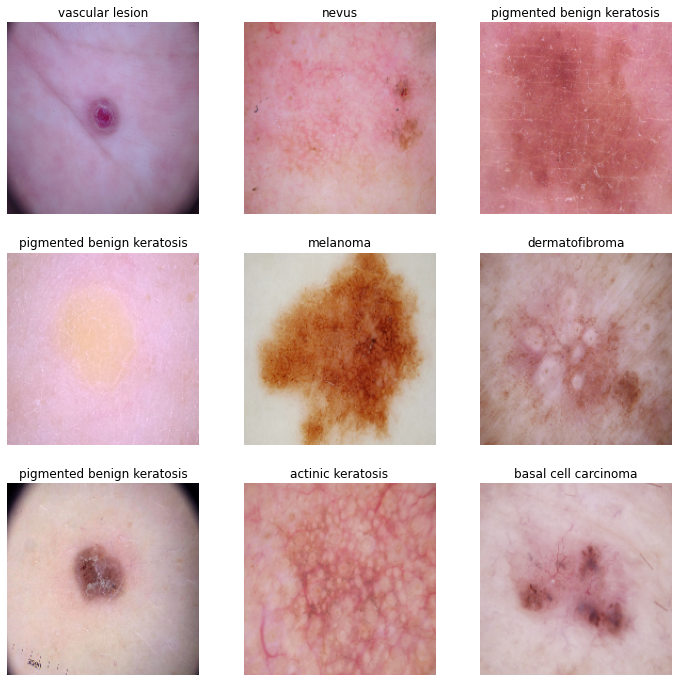

In [26]:
plt.figure(figsize=(12, 12))
for images, labels in train_ds2.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(data_aug(images)[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [36]:
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
nb_fc_neurons = 512
nb_filter = 32
input_shape = (img_width, img_height, 3)
    
model = Sequential([ data_aug,
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
      
])
    
model.add(Conv2D(nb_filter, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
    
model.add(Conv2D(nb_filter*2, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(nb_filter*4, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
    
model.add(Flatten())
model.add(Dense(nb_fc_neurons))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))


In [37]:
model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [38]:
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
70/70 [==============================] - 127s 2s/step - loss: 0.3664 - accuracy: 0.8840 - val_loss: 0.3493 - val_accuracy: 0.8889
Epoch 2/20
70/70 [==============================] - 124s 2s/step - loss: 0.3505 - accuracy: 0.8889 - val_loss: 0.3488 - val_accuracy: 0.8889
Epoch 3/20
70/70 [==============================] - 136s 2s/step - loss: 0.3503 - accuracy: 0.8889 - val_loss: 0.3490 - val_accuracy: 0.8889
Epoch 4/20
70/70 [==============================] - 128s 2s/step - loss: 0.3504 - accuracy: 0.8889 - val_loss: 0.3490 - val_accuracy: 0.8889
Epoch 5/20
70/70 [==============================] - 123s 2s/step - loss: 0.3502 - accuracy: 0.8889 - val_loss: 0.3488 - val_accuracy: 0.8889
Epoch 6/20
70/70 [==============================] - 138s 2s/step - loss: 0.3503 - accuracy: 0.8889 - val_loss: 0.3492 - val_accuracy: 0.8889
Epoch 7/20
70/70 [==============================] - 135s 2s/step - loss: 0.3503 - accuracy: 0.8889 - val_loss: 0.3488 - val_accuracy: 0.8889
Epoch 8/20
70

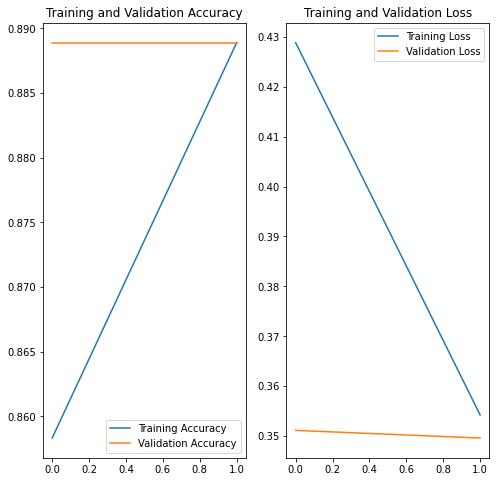

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [16]:
path_list=[]
lesion_list=[]
for i in class_names:
      
    for j in data_dir_train.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,/home/sanat/Downloads/CNN_assignment/Skin canc...,actinic keratosis
1,/home/sanat/Downloads/CNN_assignment/Skin canc...,actinic keratosis
2,/home/sanat/Downloads/CNN_assignment/Skin canc...,actinic keratosis
3,/home/sanat/Downloads/CNN_assignment/Skin canc...,actinic keratosis
4,/home/sanat/Downloads/CNN_assignment/Skin canc...,actinic keratosis
...,...,...
2234,/home/sanat/Downloads/CNN_assignment/Skin canc...,vascular lesion
2235,/home/sanat/Downloads/CNN_assignment/Skin canc...,vascular lesion
2236,/home/sanat/Downloads/CNN_assignment/Skin canc...,vascular lesion
2237,/home/sanat/Downloads/CNN_assignment/Skin canc...,vascular lesion


In [17]:
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,/home/sanat/Downloads/CNN_assignment/Skin canc...,actinic keratosis
1,/home/sanat/Downloads/CNN_assignment/Skin canc...,actinic keratosis
2,/home/sanat/Downloads/CNN_assignment/Skin canc...,actinic keratosis
3,/home/sanat/Downloads/CNN_assignment/Skin canc...,actinic keratosis
4,/home/sanat/Downloads/CNN_assignment/Skin canc...,actinic keratosis
...,...,...
2234,/home/sanat/Downloads/CNN_assignment/Skin canc...,vascular lesion
2235,/home/sanat/Downloads/CNN_assignment/Skin canc...,vascular lesion
2236,/home/sanat/Downloads/CNN_assignment/Skin canc...,vascular lesion
2237,/home/sanat/Downloads/CNN_assignment/Skin canc...,vascular lesion


<BarContainer object of 9 artists>

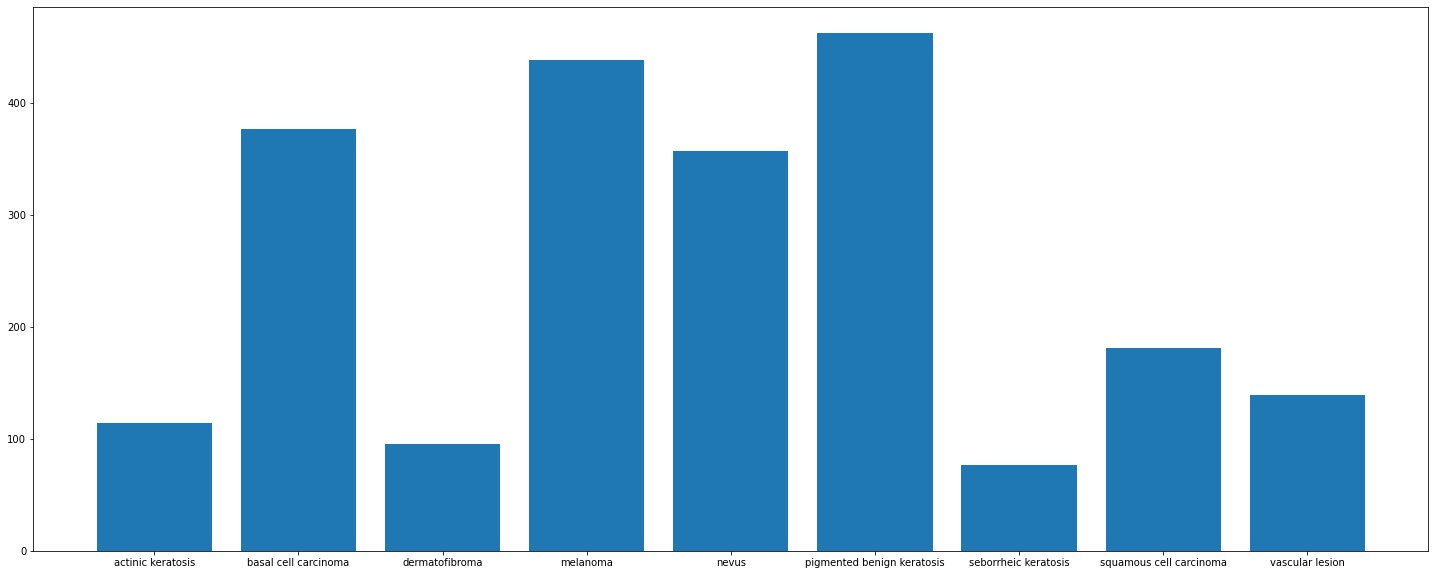

In [18]:
count=[]
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)
